In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula import api

from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Housing.csv')
df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
326,3990000,4100,4,1,1,no,no,yes,no,no,0,no,unfurnished
65,6930000,8880,3,2,2,yes,no,yes,no,yes,1,no,furnished
526,2310000,3180,2,1,1,yes,no,no,no,no,0,no,unfurnished
283,4270000,4360,4,1,2,yes,no,no,no,no,0,no,furnished
368,3675000,5640,2,1,1,no,no,no,no,no,0,no,semi-furnished


In [3]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [4]:
rows,columns = df.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

num of rows in data : 545
the number of column in the data: 13


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
#Checking number of unique rows in each feature
def unique(list1):
 
    # initialize a null list
    unique_list = []
 
    # traverse for all elements
    for x in list1:
        # check if exists in unique_list or not
        if x not in unique_list:
            unique_list.append(x)
    return len(unique_list)
for col in df.columns:
    print(col,"'s number of unique values: ", unique(df[col]))

price 's number of unique values:  219
area 's number of unique values:  284
bedrooms 's number of unique values:  6
bathrooms 's number of unique values:  4
stories 's number of unique values:  4
mainroad 's number of unique values:  2
guestroom 's number of unique values:  2
basement 's number of unique values:  2
hotwaterheating 's number of unique values:  2
airconditioning 's number of unique values:  2
parking 's number of unique values:  4
prefarea 's number of unique values:  2
furnishingstatus 's number of unique values:  3


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


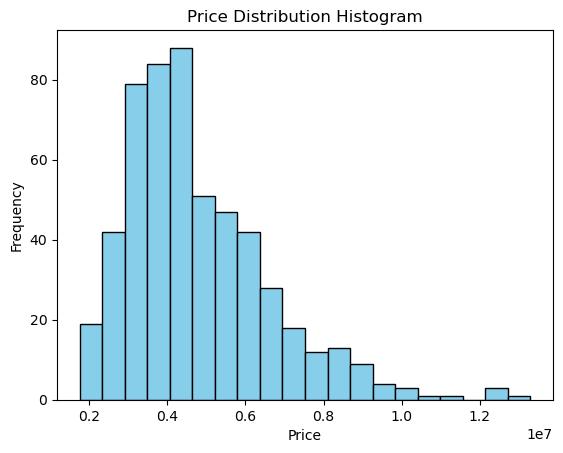

In [8]:
plt.hist(df['price'], bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Price Distribution Histogram')
 
plt.show()

<Axes: xlabel='price', ylabel='Count'>

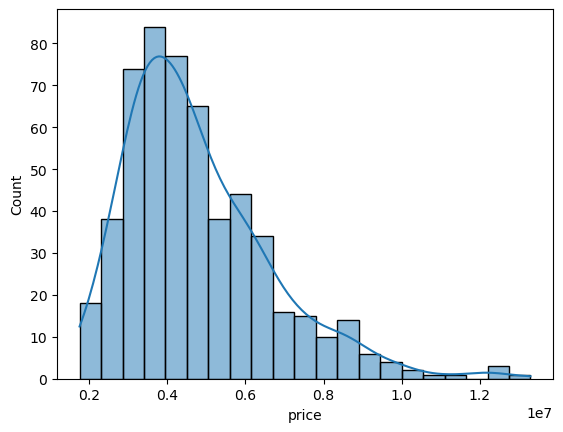

In [9]:
sns.histplot(df['price'], kde = True)

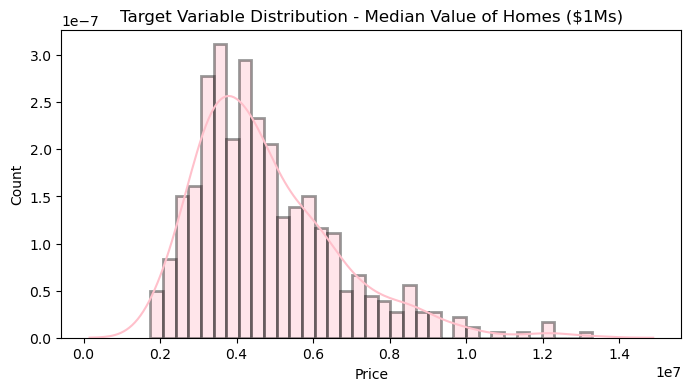

In [10]:
#Let us first analyze the distribution of the target variable
plt.figure(figsize=[8,4])
sns.distplot(df['price'], color='pink',hist_kws=dict(edgecolor="black", linewidth=2), bins=35)
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.ylabel('Count')
plt.xlabel('Price')
plt.show()

In [11]:
from scipy.stats import skew, kurtosis

print('skewness:',skew(df['price'], axis=0, bias=True))

print('kurtosis:',kurtosis(df['price'], axis=0, bias=True))

skewness: 1.2088998457878217
kurtosis: 1.9312045083457265


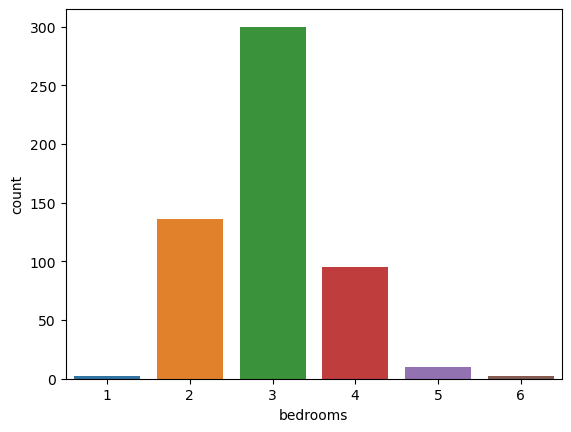

In [12]:
#Visualising the categorical features 
sns.countplot(x='bedrooms',data=df)
plt.show()

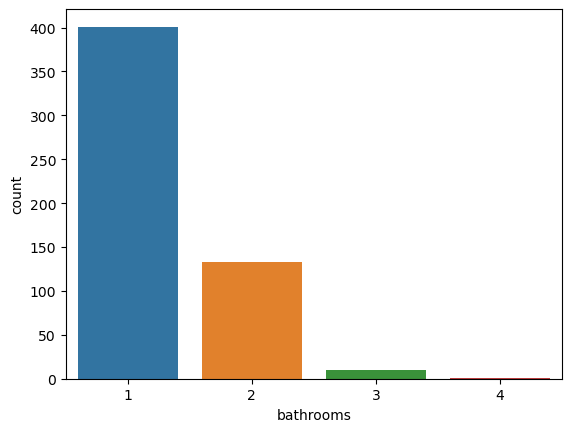

In [13]:
sns.countplot(x='bathrooms',data=df)
plt.show()

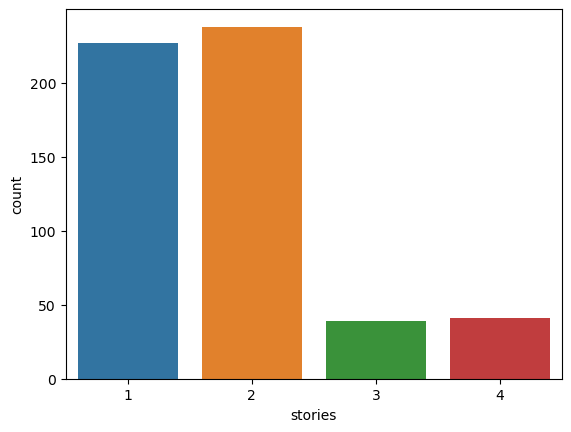

In [14]:
sns.countplot(x='stories',data=df)
plt.show()

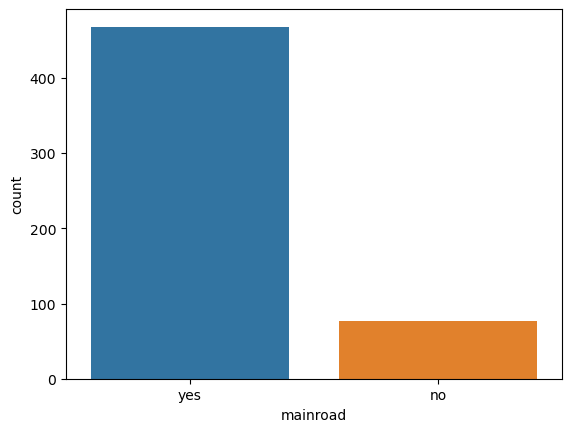

In [15]:
sns.countplot(x='mainroad',data=df)
plt.show()

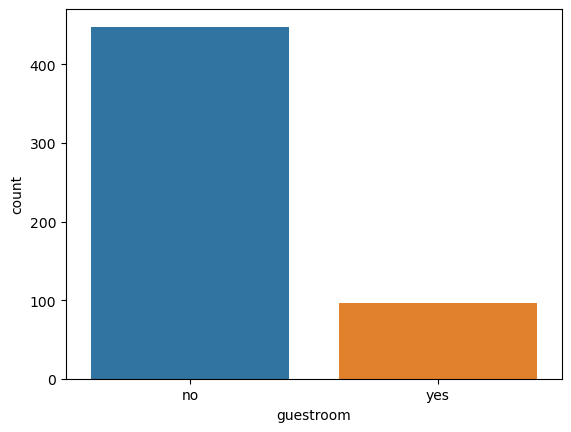

In [16]:
sns.countplot(x='guestroom',data=df)
plt.show()

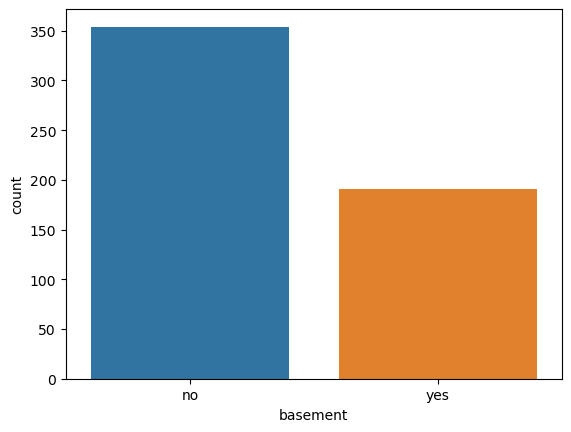

In [17]:
sns.countplot(x='basement',data=df)
plt.show()

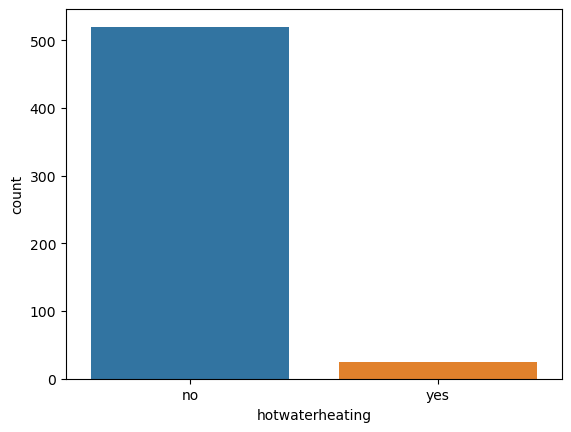

In [18]:
sns.countplot(x='hotwaterheating',data=df)
plt.show()

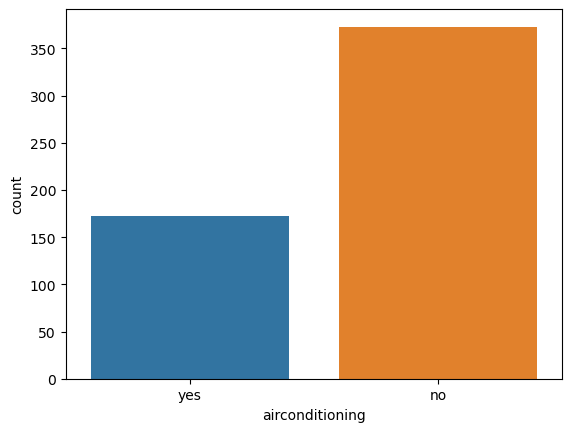

In [19]:
sns.countplot(x='airconditioning',data=df)
plt.show()

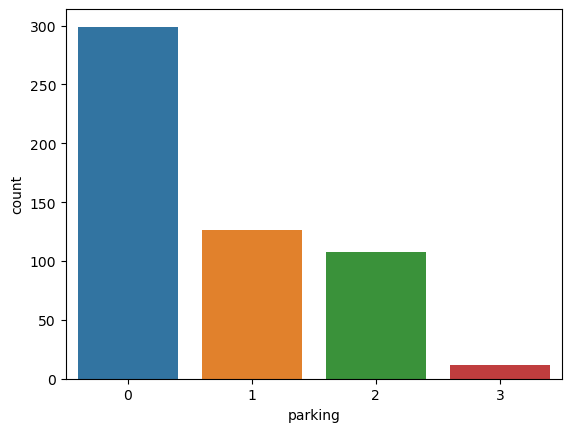

In [20]:
sns.countplot(x='parking',data=df)
plt.show()

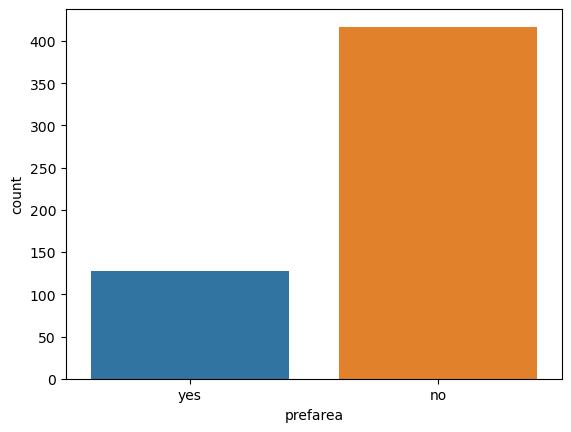

In [21]:
sns.countplot(x='prefarea',data=df)
plt.show()


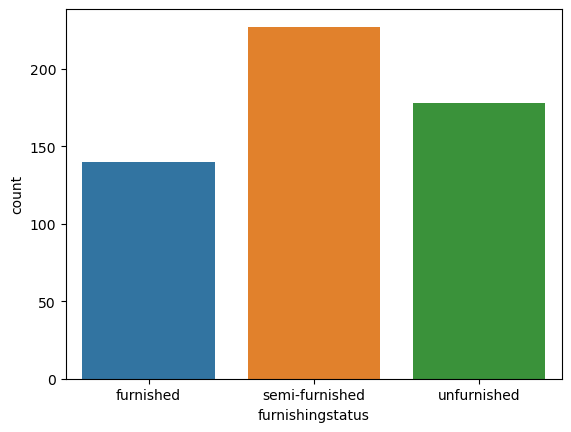

In [22]:
sns.countplot(x='furnishingstatus',data=df)
plt.show()

<Axes: xlabel='furnishingstatus', ylabel='price'>

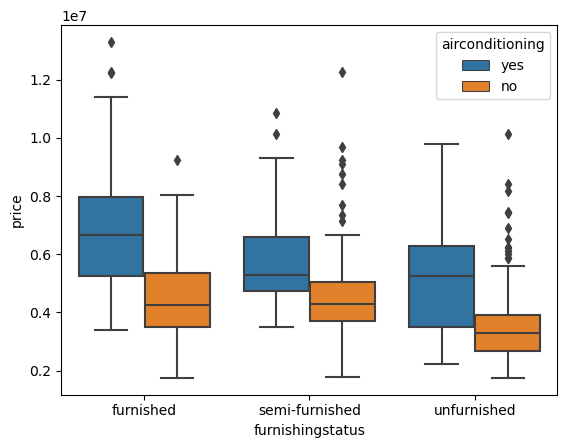

In [23]:
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = df)

<Axes: xlabel='area', ylabel='price'>

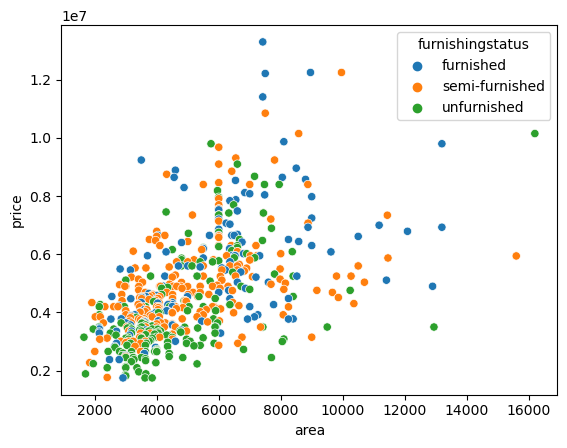

In [24]:
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

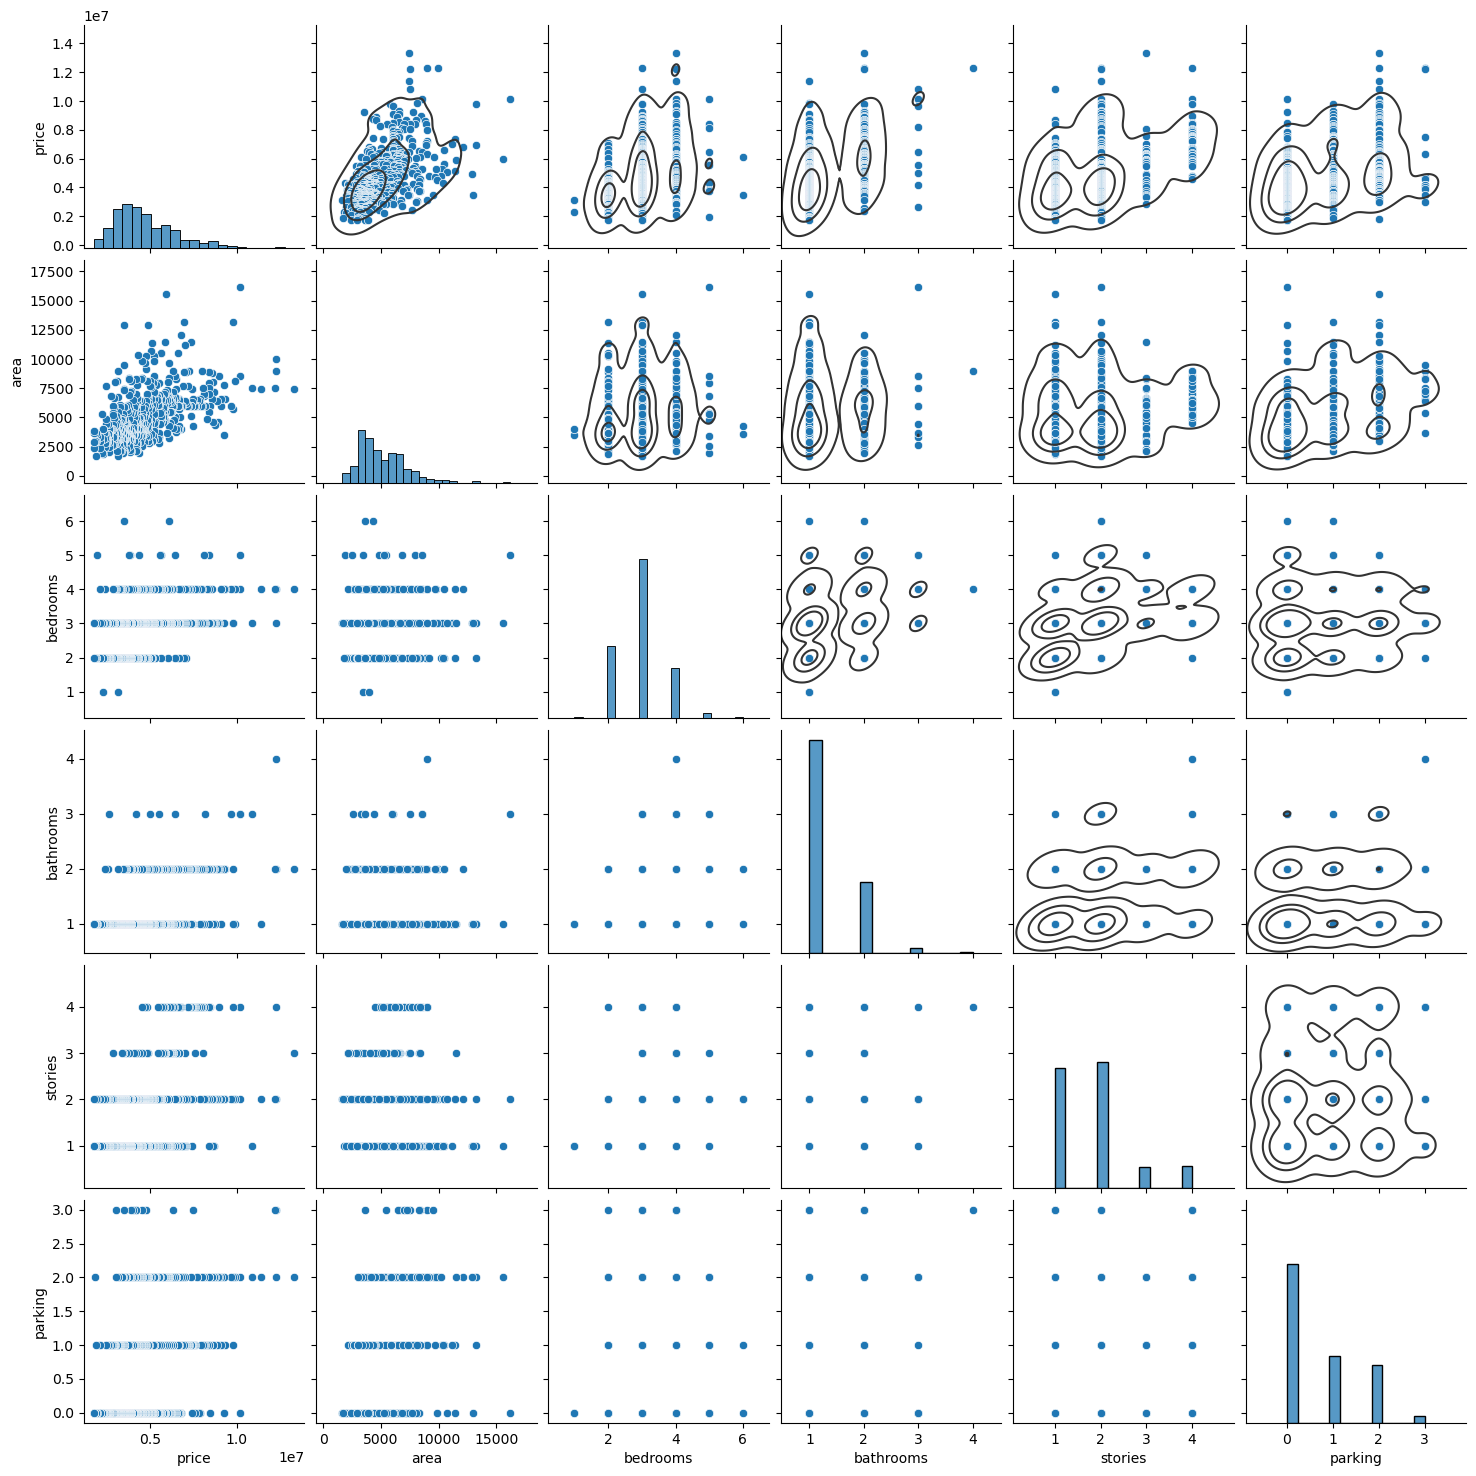

In [25]:
#Pairplots for all the Feature, We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.
g = sns.pairplot(df)
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

<Axes: xlabel='area', ylabel='Count'>

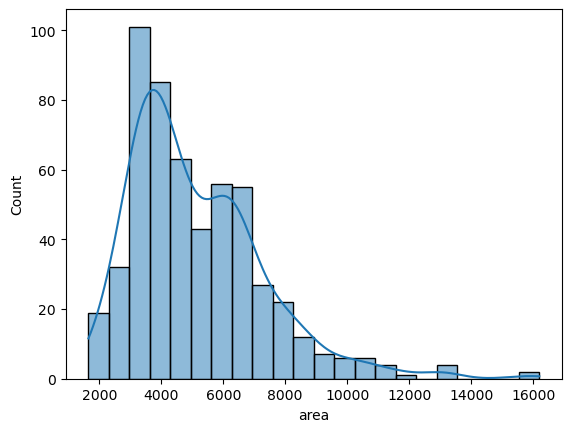

In [26]:
sns.histplot(data = df, x = "area", kde = True)

<Axes: xlabel='area'>

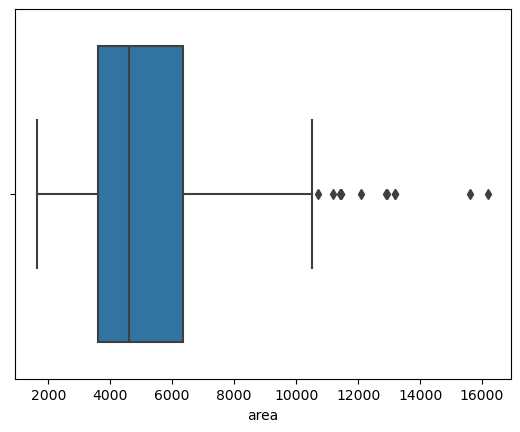

In [27]:
sns.boxplot(x=df['area'])
#There seem to be some outliers. let us fix these in the upcoming section...

<Axes: xlabel='price'>

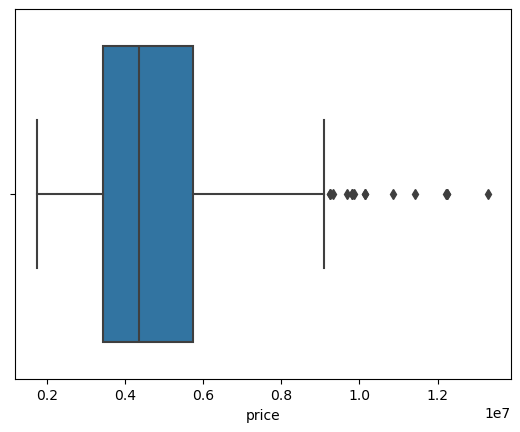

In [28]:
sns.boxplot(x=df['price'])

In [29]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [30]:
df.duplicated().sum() # duplicate values check

0

Before removal of outliers, The dataset had 545 samples.
After removal of outliers, The dataset now has 533 samples.


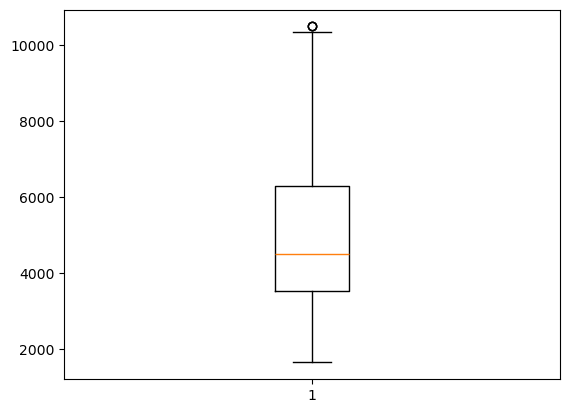

In [31]:
# Dealing with outliers in area 

print('Before removal of outliers, The dataset had {} samples.'.format(df.shape[0]))
Q1 = df.area.quantile(0.25)
Q3 = df.area.quantile(0.75)
IQR = Q3 - Q1
df = df[(df.area >= Q1 - 1.5*IQR) & (df.area <= Q3 + 1.5*IQR)]
plt.boxplot(df.area)

print('After removal of outliers, The dataset now has {} samples.'.format(df.shape[0]))

In [32]:
#Feature Engineering
df2 = df.copy()
df2['furnishingstatus'].replace(to_replace='unfurnished', value = 0, inplace = True)
df2['furnishingstatus'].replace(to_replace='semi-furnished', value= 1, inplace = True)
df2['furnishingstatus'].replace(to_replace='furnished', value= 2, inplace = True)

In [33]:
mainroad = pd.get_dummies(df2['mainroad'], drop_first=True, dtype=int)
df2['mainroad'] = mainroad
guestroom = pd.get_dummies(df2['guestroom'], drop_first=True, dtype=int)
df2['guestroom'] = guestroom
basement = pd.get_dummies(df2['basement'], drop_first=True, dtype=int)
df2['basement'] = basement
hotwaterheating = pd.get_dummies(df2['hotwaterheating'], drop_first=True, dtype=int)
df2['hotwaterheating'] = hotwaterheating
airconditioning = pd.get_dummies(df2['airconditioning'], drop_first=True, dtype=int)
df2['airconditioning'] = airconditioning
prefarea = pd.get_dummies(df2['prefarea'], drop_first=True, dtype=int)
df2['prefarea'] = prefarea

In [34]:
df2.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


In [35]:
df2.sample(6)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
298,4200000,5800,3,1,1,1,0,0,1,0,2,0,1
385,3570000,3640,2,1,1,1,0,0,0,0,0,0,0
49,7420000,7440,3,2,1,1,1,1,0,1,0,1,1
246,4550000,3520,3,1,1,1,0,0,0,0,0,1,1
425,3360000,3185,2,1,1,1,0,1,0,0,2,0,2
447,3150000,3500,2,1,1,0,0,1,0,0,0,0,1


In [36]:
rows,columns = df2.shape
print("num of rows in data :",rows)
print("the number of column in the data:",columns)

num of rows in data : 533
the number of column in the data: 13


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 533 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   price             533 non-null    int64
 1   area              533 non-null    int64
 2   bedrooms          533 non-null    int64
 3   bathrooms         533 non-null    int64
 4   stories           533 non-null    int64
 5   mainroad          533 non-null    int32
 6   guestroom         533 non-null    int32
 7   basement          533 non-null    int32
 8   hotwaterheating   533 non-null    int32
 9   airconditioning   533 non-null    int32
 10  parking           533 non-null    int64
 11  prefarea          533 non-null    int32
 12  furnishingstatus  533 non-null    int64
dtypes: int32(6), int64(7)
memory usage: 45.8 KB


In [38]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
price,533.0,4.726995e+06,1.851251e+06,1750000.0,3430000.0,4305000.0,5652500.0,13300000.0
area,533.0,4.980724e+03,1.855265e+03,1650.0,3540.0,4500.0,6300.0,10500.0
bedrooms,533.0,2.960600e+00,7.359877e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,533.0,1.287054e+00,5.001516e-01,1.0,1.0,1.0,2.0,4.0
stories,533.0,1.808630e+00,8.719526e-01,1.0,1.0,2.0,2.0,4.0
mainroad,533.0,8.555347e-01,3.518912e-01,0.0,1.0,1.0,1.0,1.0
guestroom,533.0,1.801126e-01,3.846422e-01,0.0,0.0,0.0,0.0,1.0
basement,533.0,3.489681e-01,4.770916e-01,0.0,0.0,0.0,1.0,1.0
hotwaterheating,533.0,4.502814e-02,2.075607e-01,0.0,0.0,0.0,0.0,1.0
airconditioning,533.0,3.170732e-01,4.657733e-01,0.0,0.0,0.0,1.0,1.0


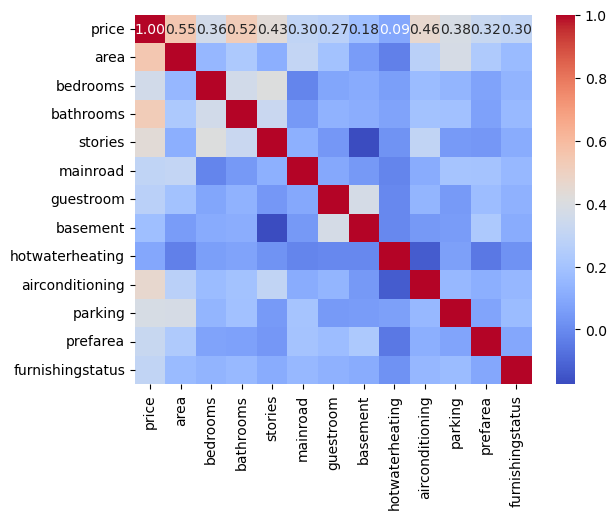

In [39]:
sns.heatmap(df2.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [40]:
#Splitting the data intro training & testing sets
target = 'price'
X = df2.drop([target],axis=1)
Y = df2[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',
      Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (533, 12) (533,) 
Training set  --->  (426, 12) (426,) 
Testing set   --->  (107, 12)  (107,)


In [41]:
#Feature Scaling (Standardization)

std = StandardScaler()

Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)

Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)

In [42]:
print('\033[1mStandardardization on Training set'.center(120))
display(Train_X_std.describe().T)

                                         Standardardization on Training set                                         


,count,mean,std,min,25%,50%,75%,max
area,426.0,-6.463270e-17,1.001176,-1.797874,-0.748789,-0.255102,0.611016,2.992840
bedrooms,426.0,-1.709639e-16,1.001176,-2.637489,-1.288665,0.060159,0.060159,4.106631
bathrooms,426.0,1.209257e-16,1.001176,-0.576679,-0.576679,-0.576679,1.436971,5.464271
stories,426.0,-6.984502e-17,1.001176,-0.915315,-0.915315,0.255629,0.255629,2.597517
mainroad,426.0,9.799152e-17,1.001176,-2.335497,0.428174,0.428174,0.428174,0.428174
guestroom,426.0,-2.501911e-17,1.001176,-0.465986,-0.465986,-0.465986,-0.465986,2.145988
basement,426.0,1.250956e-17,1.001176,-0.756278,-0.756278,-0.756278,1.322266,1.322266
hotwaterheating,426.0,-3.544374e-17,1.001176,-0.203874,-0.203874,-0.203874,-0.203874,4.904979
airconditioning,426.0,1.355202e-17,1.001176,-0.681115,-0.681115,-0.681115,1.468181,1.468181
parking,426.0,6.671763e-17,1.001176,-0.797919,-0.797919,-0.797919,0.370169,2.706345


                                       Correlation Matrix                                       


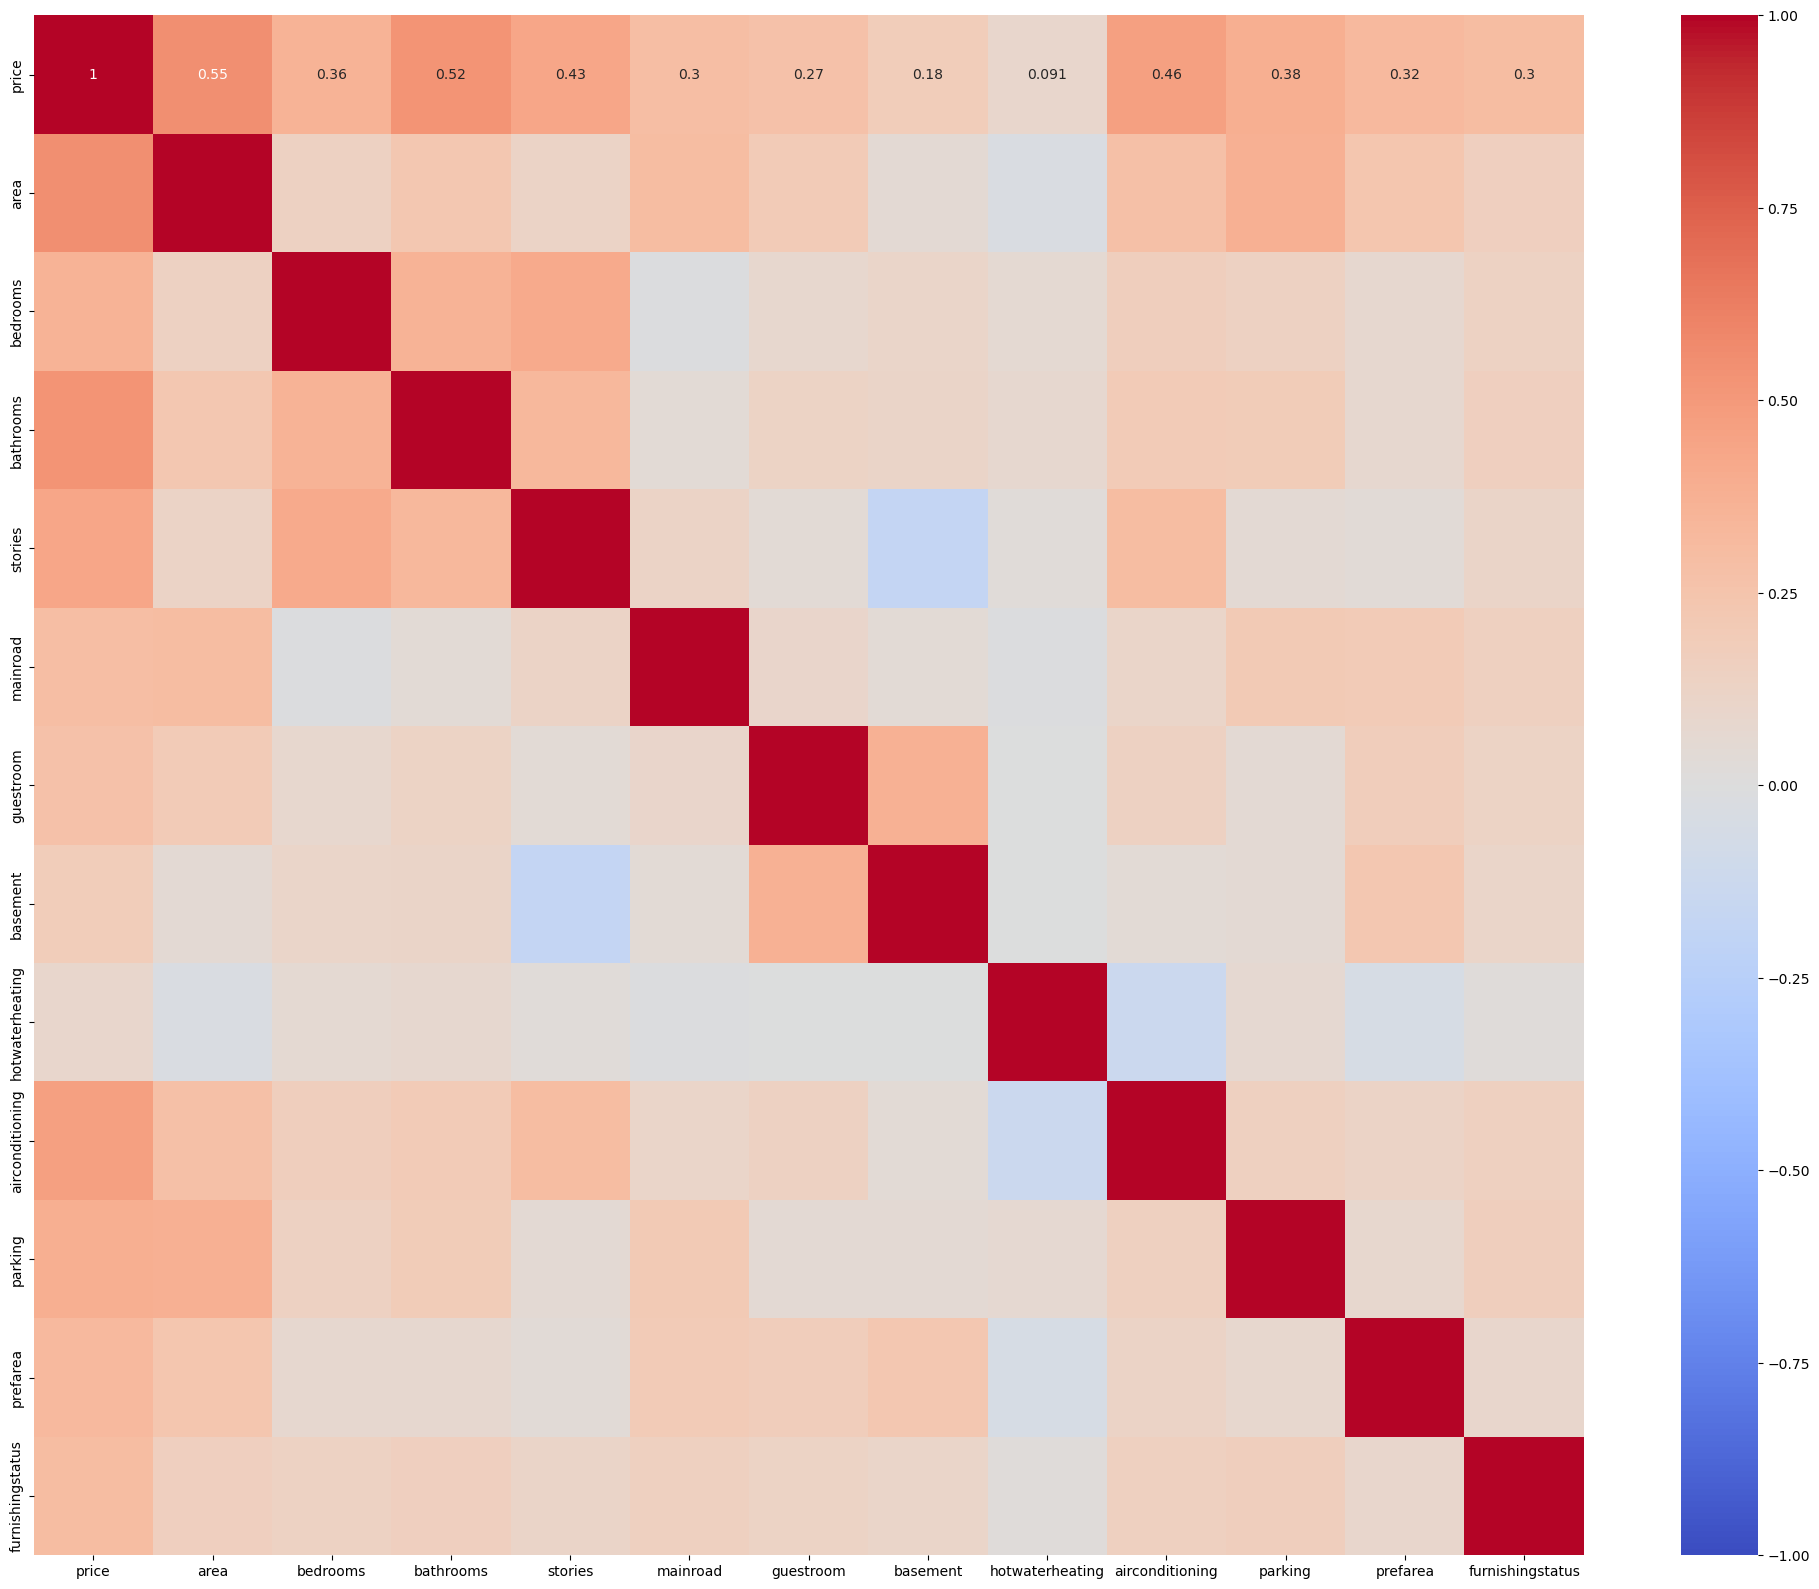

In [43]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df2.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm') 
plt.show()

In [44]:
#Testing a Linear Regression model with statsmodels
from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.652
Method:                 Least Squares   F-statistic:                     67.29
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.90e-89
Time:                        19:22:57   Log-Likelihood:                -6520.4
No. Observations:                 426   AIC:                         1.307e+04
Df Residuals:                     413   BIC:                         1.312e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4.717e+06   5.29e+04     89.232      0.000    4.61e+06    4.82e+06
area              4.564e+05   6.28e+04      7.265      0.000    3.33e+05     5.8e+05
bedrooms          1.005e+05   6.13e+04      1.641      0.102   -1.99e+04    2.21e+05
bathrooms          4.62e+05   5.98e+04      7.727      0.000    3.44e+05    5.79e+05
stories           4.043e+05   6.37e+04      6.343      0.000    2.79e+05     5.3e+05
mainroad            1.8e+05   5.75e+04      3.132      0.002     6.7e+04    2.93e+05
guestroom          1.26e+05   5.83e+04      2.162      0.031    1.15e+04    2.41e+05
basement          1.595e+05   6.07e+04      2.627      0.009    4.01e+04    2.79e+05
hotwaterheating   2.057e+05   5.42e+04      3.794      0.000    9.91e+04    3.12e+05
airconditioning   3.743e+05   5.87e+04      6.376      0.000    2.59e+05     4.9e+05
parking           2.345e+05   5.83e+04      4.020      0.000     1.2e+05    3.49e+05
prefarea          2.756e+05   5.65e+04      4.877      0.000    1.65e+05    3.87e+05
furnishingstatus    1.5e+05   5.51e+04      2.723      0.007    4.17e+04    2.58e+05
==============================================================================
Omnibus:                       84.345   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.918
Skew:                           0.948   Prob(JB):                     1.95e-50
Kurtosis:                       6.050   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
Train_X_std.drop(['bedrooms'], axis = 1, inplace=True)
Test_X_std.drop(['bedrooms'], axis = 1, inplace=True)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [462471.96815259 481863.02456962 441139.14753463 170158.46015036
 122291.99826536 173489.29800323 206477.09587415 374478.47929478
 240488.45873628 275454.08751257 155400.1980238 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


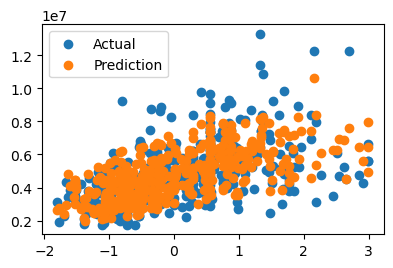



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.659391304615061
Residual Sum of Squares (RSS) on Training set  ---> 494783098725147.1
Mean Squared Error (MSE) on Training set       ---> 1161462673063.7256
Root Mean Squared Error (RMSE) on Training set ---> 1077711.7764336278

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.7218542129195782
Residual Sum of Squares (RSS) on Training set  ---> 103015340369921.17
Mean Squared Error (MSE) on Training set       ---> 962760190373.0951
Root Mean Squared Error (RMSE) on Training set ---> 981203.4398498076

--------------------Residual Plots--------------------


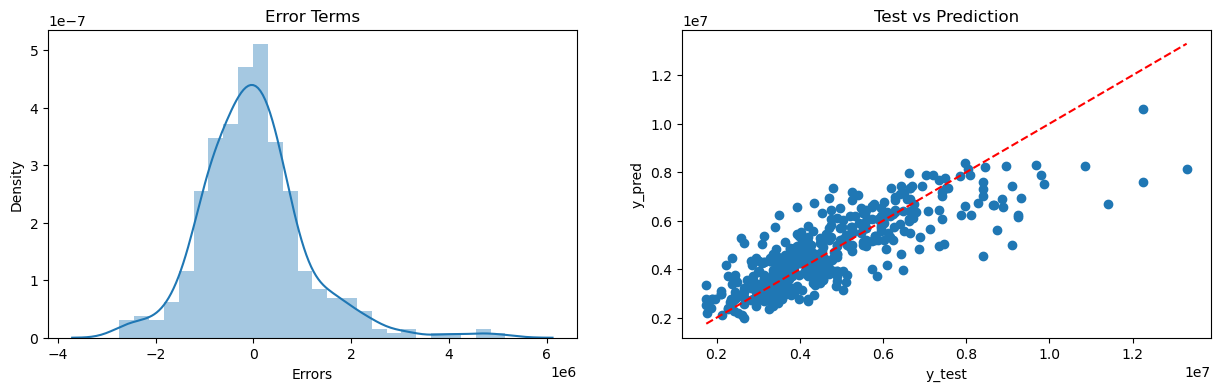

In [46]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
    #Plotting predicted points alongside the actual datapoints 
plt.figure(figsize=[15,6])
for e,i in enumerate(rc):
    plt.subplot(2,3,e+1)
    plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
    plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
    plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
Model_Evaluation_Comparison_Matrix.loc[0,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred1))
plt.title('Error Terms')          
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(Train_Y,pred1)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()


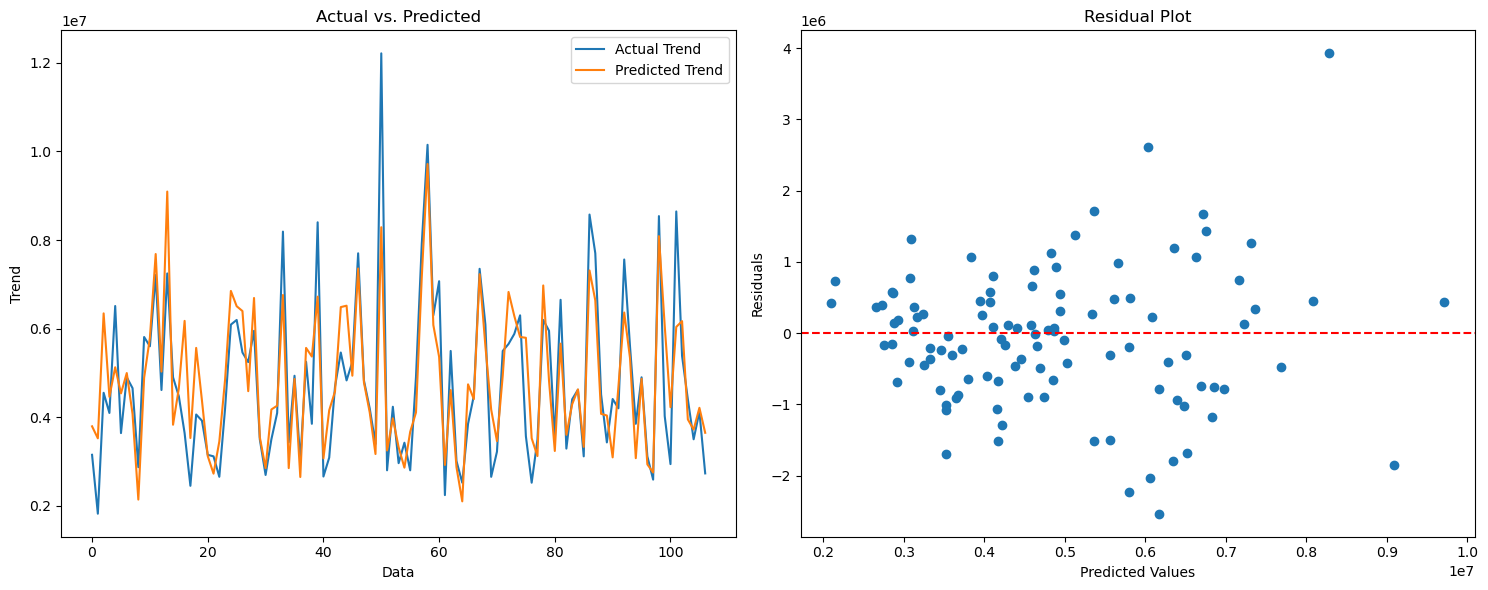

In [47]:
plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(Test_Y)), Test_Y, label='Actual Trend')

plt.plot(np.arange(len(Test_Y)), pred2, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')
# Plot Residuals
residuals = Test_Y - pred2

plt.subplot(1, 2, 2)
plt.scatter(pred2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()

In [48]:
df3 = df.copy()

df3['mainroad'] = pd.get_dummies(df3['mainroad'], drop_first=True, dtype=int)
df3['guestroom'] = pd.get_dummies(df3['guestroom'], drop_first=True, dtype=int)
df3['basement'] = pd.get_dummies(df3['basement'], drop_first=True, dtype=int)
df3['hotwaterheating'] = pd.get_dummies(df3['hotwaterheating'], drop_first=True, dtype=int)
df3['airconditioning'] = pd.get_dummies(df3['airconditioning'], drop_first=True, dtype=int)
df3['prefarea'] = pd.get_dummies(df3['prefarea'], drop_first=True, dtype=int)

df3 = pd.concat([df3.drop(['furnishingstatus'], axis=1), pd.DataFrame(pd.get_dummies(df3['furnishingstatus'], drop_first=True, dtype=int, prefix=str('furnishingstatus')))],axis=1)
df3 = pd.concat([df3.drop(['bedrooms'], axis=1), pd.DataFrame(pd.get_dummies(df3['bedrooms'], drop_first=True, dtype=int, prefix=str('bedrooms')))],axis=1)
df3 = pd.concat([df3.drop(['stories'], axis=1), pd.DataFrame(pd.get_dummies(df3['stories'], drop_first=True, dtype=int, prefix=str('stories')))],axis=1)
df3 = pd.concat([df3.drop(['bathrooms'], axis=1), pd.DataFrame(pd.get_dummies(df3['bathrooms'], drop_first=True, dtype=int, prefix=str('bathrooms')))],axis=1)
df3 = pd.concat([df3.drop(['parking'], axis=1), pd.DataFrame(pd.get_dummies(df3['parking'], drop_first=True, dtype=int, prefix=str('parking')))],axis=1)

In [49]:
df3.sample(5)

,price,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,...,bedrooms_6,stories_2,stories_3,stories_4,bathrooms_2,bathrooms_3,bathrooms_4,parking_1,parking_2,parking_3
266,4403000,4880,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,1,0
380,3605000,4500,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
51,7420000,6325,1,0,0,0,1,0,0,1,...,0,0,0,1,0,0,0,1,0,0
168,5250000,4260,1,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
332,3920000,5500,1,1,1,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0


In [50]:
for col in df3.columns:
    print(col)

price
area
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea
furnishingstatus_semi-furnished
furnishingstatus_unfurnished
bedrooms_2
bedrooms_3
bedrooms_4
bedrooms_5
bedrooms_6
stories_2
stories_3
stories_4
bathrooms_2
bathrooms_3
bathrooms_4
parking_1
parking_2
parking_3


In [51]:
df3.columns=[i.replace('-','_') for i in df3.columns]
m=[]
for i in df3.columns.values:
    m.append(i.replace(' ','_'))
    
df3.columns = m
target = 'price'
X = df3.drop([target],axis=1)
Y = df3[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (533, 23) (533,) 
Training set  --->  (426, 23) (426,) 
Testing set   --->  (107, 23)  (107,)


In [52]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bedrooms_2,...,bedrooms_6,stories_2,stories_3,stories_4,bathrooms_2,bathrooms_3,bathrooms_4,parking_1,parking_2,parking_3
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-6.463270e-17,9.799152e-17,-2.501911e-17,1.250956e-17,-3.544374e-17,1.355202e-17,-2.918896e-17,-1.876433e-17,-3.752867e-17,-8.756689e-17,...,-4.169852e-18,1.167558e-16,2.501911e-17,1.667941e-17,2.084926e-17,4.169852e-17,8.339703e-18,-1.459448e-17,-1.355202e-17,8.339703e-17
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-1.797874e+00,-2.335497e+00,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.972335e-01,...,-4.850713e-02,-8.761477e-01,-2.702737e-01,-2.752409e-01,-5.791573e-01,-1.195229e-01,-4.850713e-02,-5.466082e-01,-4.919172e-01,-1.469106e-01
25%,-7.487891e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.972335e-01,...,-4.850713e-02,-8.761477e-01,-2.702737e-01,-2.752409e-01,-5.791573e-01,-1.195229e-01,-4.850713e-02,-5.466082e-01,-4.919172e-01,-1.469106e-01
50%,-2.551019e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.972335e-01,...,-4.850713e-02,-8.761477e-01,-2.702737e-01,-2.752409e-01,-5.791573e-01,-1.195229e-01,-4.850713e-02,-5.466082e-01,-4.919172e-01,-1.469106e-01
75%,6.110159e-01,4.281744e-01,-4.659859e-01,1.322266e+00,-2.038745e-01,1.468181e+00,-5.393599e-01,1.186077e+00,1.429286e+00,1.674387e+00,...,-4.850713e-02,1.141360e+00,-2.702737e-01,-2.752409e-01,1.150196e+00,-1.195229e-01,-4.850713e-02,-5.466082e-01,-4.919172e-01,-1.469106e-01
max,2.992840e+00,4.281744e-01,2.145988e+00,1.322266e+00,4.904979e+00,1.468181e+00,1.854050e+00,1.186077e+00,1.429286e+00,1.674387e+00,...,2.061553e+01,1.141360e+00,3.699953e+00,3.633180e+00,1.726647e+00,8.366600e+00,2.061553e+01,1.829464e+00,2.032863e+00,6.806859e+00



                                          Standardardization on Testing set                                          


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bedrooms_2,...,bedrooms_6,stories_2,stories_3,stories_4,bathrooms_2,bathrooms_3,bathrooms_4,parking_1,parking_2,parking_3
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000,107.000000,107.000000
mean,0.025531,0.144059,0.022233,-0.154083,0.130350,0.001839,0.042216,0.029248,0.016627,-0.130171,...,0.144615,0.010047,0.063671,0.126559,-0.040418,0.118406,-4.850713e-02,0.008549,-0.019996,0.048055
std,1.021135,0.843283,1.023054,0.947331,1.269193,1.005431,1.031339,1.009305,1.010644,0.922384,...,1.997668,1.005993,1.107146,1.192583,0.980290,1.407479,1.394310e-17,1.010164,0.988902,1.153328
min,-1.635477,-2.335497,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.597234,...,-0.048507,-0.876148,-0.270274,-0.275241,-0.579157,-0.119523,-4.850713e-02,-0.546608,-0.491917,-0.146911
25%,-0.809959,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.597234,...,-0.048507,-0.876148,-0.270274,-0.275241,-0.579157,-0.119523,-4.850713e-02,-0.546608,-0.491917,-0.146911
50%,-0.200970,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.597234,...,-0.048507,-0.876148,-0.270274,-0.275241,-0.579157,-0.119523,-4.850713e-02,-0.546608,-0.491917,-0.146911
75%,0.762586,0.428174,-0.465986,1.322266,-0.203874,1.468181,-0.539360,1.186077,1.429286,-0.597234,...,-0.048507,1.141360,-0.270274,-0.275241,-0.579157,-0.119523,-4.850713e-02,-0.546608,-0.491917,-0.146911
max,2.867794,0.428174,2.145988,1.322266,4.904979,1.468181,1.854050,1.186077,1.429286,1.674387,...,20.615528,1.141360,3.699953,3.633180,1.726647,8.366600,-4.850713e-02,1.829464,2.032863,6.806859


                                       Correlation Matrix                                       


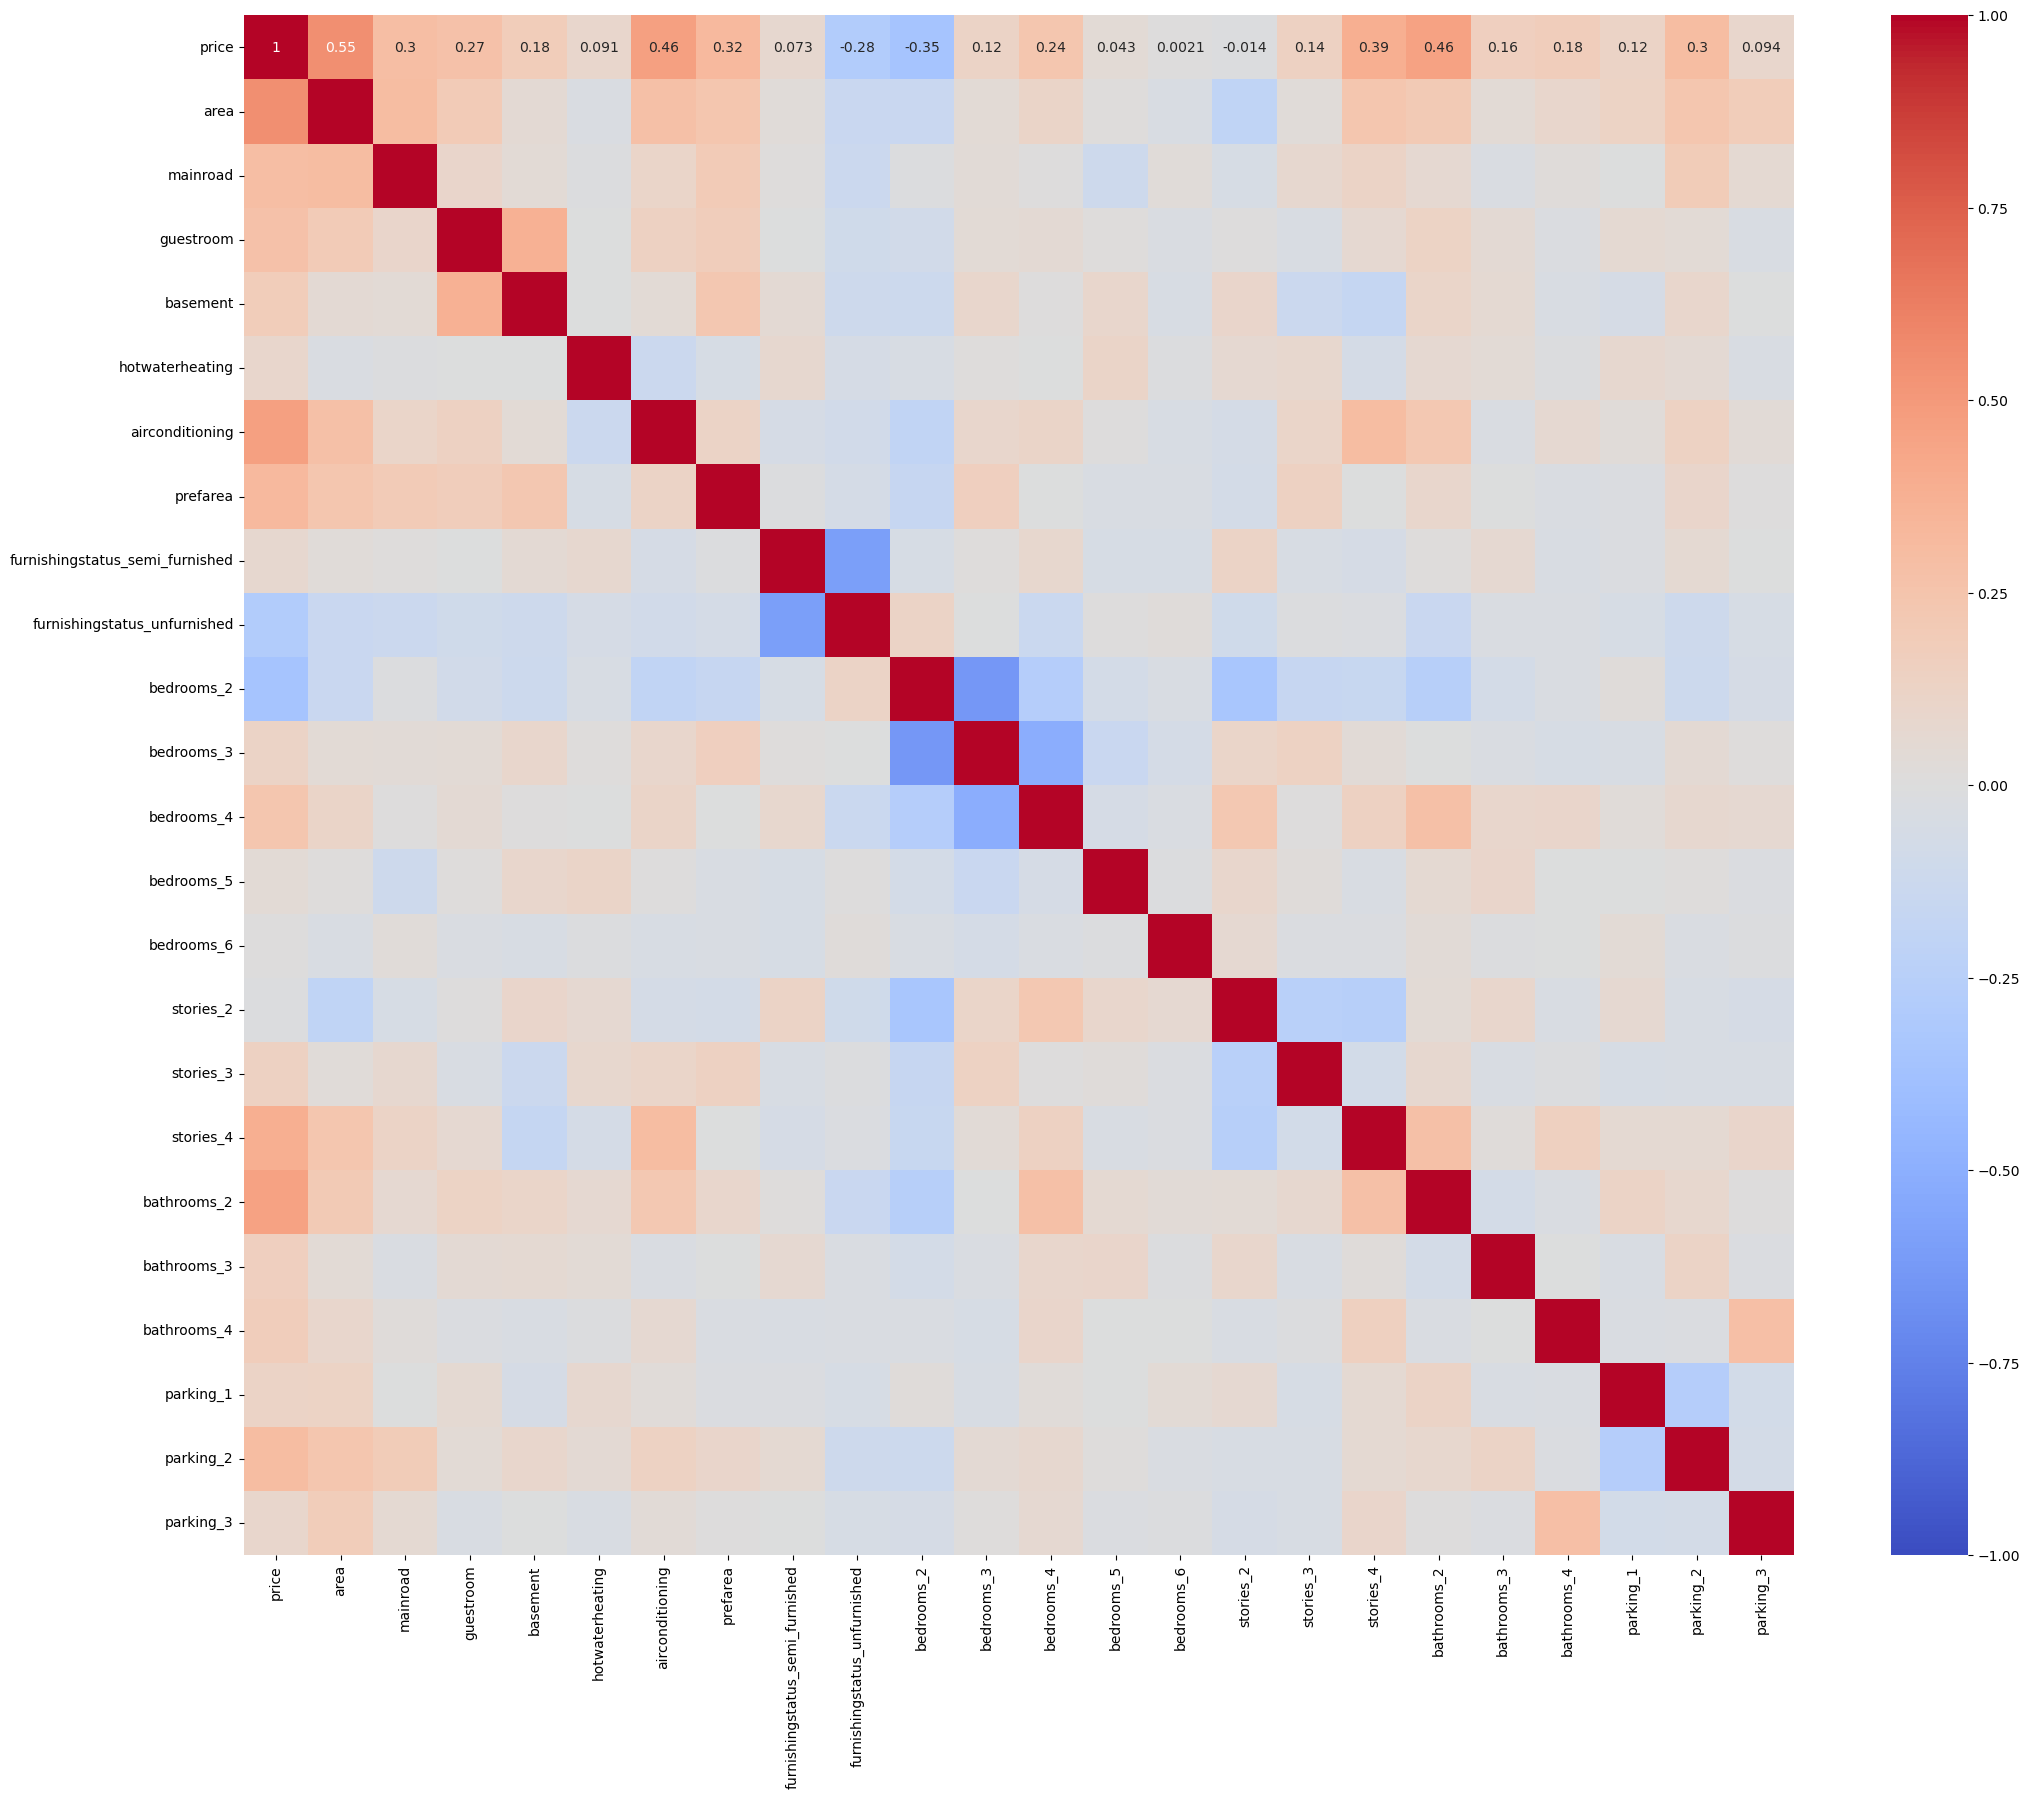

In [58]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(100))
plt.figure(figsize=[25,20])
sns.heatmap(df3.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm')
plt.show()

In [54]:
#Testing a Linear Regression model with statsmodels
from statsmodels.formula import api

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     36.96
Date:                Sat, 20 Apr 2024   Prob (F-statistic):           2.06e-84
Time:                        19:22:58   Log-Likelihood:                -6509.2
No. Observations:                 426   AIC:                         1.307e+04
Df Residuals:                     402   BIC:                         1.316e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.717e+06   5.22e+04     90.378      0.000    4.61e+06    4.82e+06
area                             4.356e+05   6.41e+04      6.799      0.000     3.1e+05    5.62e+05
mainroad                         1.785e+05   5.77e+04      3.092      0.002     6.5e+04    2.92e+05
guestroom                        1.197e+05   5.78e+04      2.071      0.039    6082.572    2.33e+05
basement                         1.712e+05   6.15e+04      2.784      0.006    5.03e+04    2.92e+05
hotwaterheating                  2.006e+05   5.48e+04      3.662      0.000    9.29e+04    3.08e+05
airconditioning                  3.635e+05   5.89e+04      6.168      0.000    2.48e+05    4.79e+05
prefarea                         2.711e+05   5.75e+04      4.711      0.000    1.58e+05    3.84e+05
furnishingstatus_semi_furnished  1.509e+04   6.71e+04      0.225      0.822   -1.17e+05    1.47e+05
furnishingstatus_unfurnished    -1.688e+05   6.78e+04     -2.489      0.013   -3.02e+05   -3.55e+04
bedrooms_2                      -3.385e+04    4.8e+05     -0.070      0.944   -9.78e+05    9.11e+05
bedrooms_3                       1.077e+05   5.45e+05      0.197      0.844   -9.64e+05    1.18e+06
bedrooms_4                       1.215e+05   4.18e+05      0.291      0.771      -7e+05    9.43e+05
bedrooms_5                       3.933e+04   1.66e+05      0.237      0.812   -2.86e+05    3.65e+05
bedrooms_6                       8.462e+04   7.49e+04      1.130      0.259   -6.26e+04    2.32e+05
stories_2                        1.341e+05   6.97e+04      1.923      0.055   -2986.085    2.71e+05
stories_3                        2.289e+05   6.13e+04      3.735      0.000    1.08e+05    3.49e+05
stories_4                        3.725e+05   6.46e+04      5.764      0.000    2.45e+05       5e+05
bathrooms_2                      3.722e+05   5.98e+04      6.224      0.000    2.55e+05     4.9e+05
bathrooms_3                      1.886e+05    5.4e+04      3.492      0.001    8.24e+04    2.95e+05
bathrooms_4                      2.801e+05   5.68e+04      4.934      0.000    1.69e+05    3.92e+05
parking_1                         1.67e+05   5.78e+04      2.887      0.004    5.33e+04    2.81e+05
parking_2                        2.781e+05   5.97e+04      4.662      0.000    1.61e+05    3.95e+05
parking_3                       -5.772e+04   5.72e+04     -1.009      0.314    -1.7e+05    5.47e+04
==============================================================================
Omnibus:                       96.025   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.474
Skew:                           1.058   Prob(JB):                     2.51e-60
Kurtosis:                       6.315   Cond. No.                  

In [55]:
Train_X_std.drop(['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'parking_3', 'stories_2', 'furnishingstatus_semi_furnished'], axis = 1, inplace=True)
Test_X_std.drop(['bedrooms_2', 'bedrooms_3', 'bedrooms_4', 'bedrooms_5', 'bedrooms_6', 'parking_3', 'stories_2', 'furnishingstatus_semi_furnished'], axis = 1, inplace=True)

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [ 403158.2795346   175413.80956248  118392.31252757  178029.33790283
  207047.85845141  382521.59287567  274353.38218844 -200055.32690275
  213617.18847502  341709.54884133  435889.14577506  216328.57553405
  271743.19668313  177233.55343012  293962.8157676 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


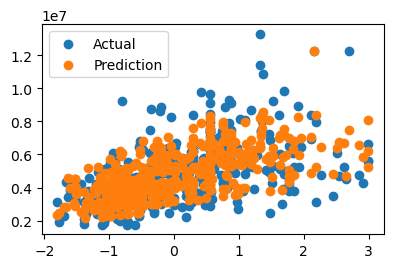



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.6616846377926279
Residual Sum of Squares (RSS) on Training set  ---> 491451702576486.56
Mean Squared Error (MSE) on Training set       ---> 1153642494311.0012
Root Mean Squared Error (RMSE) on Training set ---> 1074077.50852115

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.6966862009554988
Residual Sum of Squares (RSS) on Training set  ---> 112336679895240.83
Mean Squared Error (MSE) on Training set       ---> 1049875513039.6339
Root Mean Squared Error (RMSE) on Training set ---> 1024634.3313785822

--------------------Residual Plots--------------------


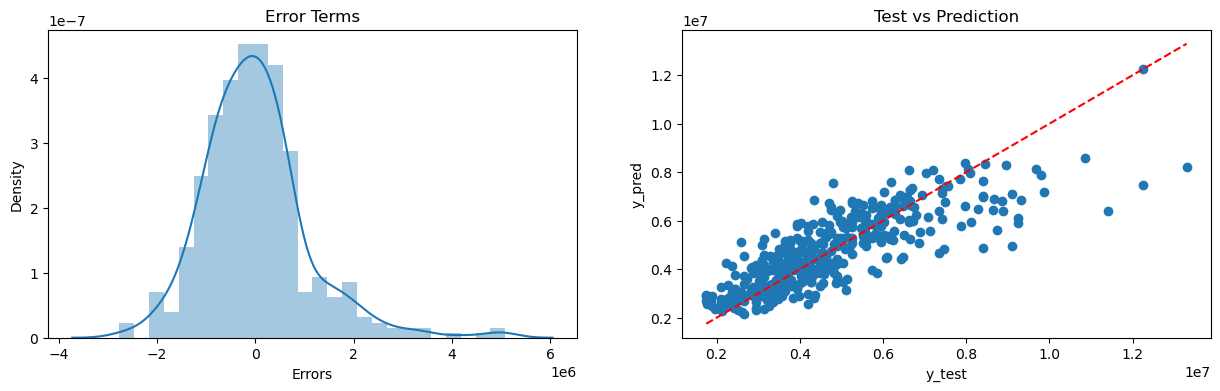

In [56]:
MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])
rc=np.random.choice(Train_X_std.loc[:,Train_X_std.nunique()>=50].columns.values,1,replace=False)
    #Plotting predicted points alongside the actual datapoints 
plt.figure(figsize=[15,6])
for e,i in enumerate(rc):
    plt.subplot(2,3,e+1)
    plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
    plt.scatter(y=pred1, x=Train_X_std[i], label='Prediction')
    plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),20))
    
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),20))

print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),20))
print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),20))
print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),20))
print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),20))
print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
Model_Evaluation_Comparison_Matrix.loc[0,'Train-R2']  = round(r2_score(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-R2']   = round(r2_score(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),20)
Model_Evaluation_Comparison_Matrix.loc[0,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),20)
# Plotting y_test and y_pred to understand the spread.
plt.figure(figsize=[15,4])

plt.subplot(1,2,1)
sns.distplot((Train_Y - pred1))
plt.title('Error Terms')          
plt.xlabel('Errors') 

plt.subplot(1,2,2)
plt.scatter(Train_Y,pred1)
plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
plt.title('Test vs Prediction')         
plt.xlabel('y_test')                       
plt.ylabel('y_pred')                       
plt.show()

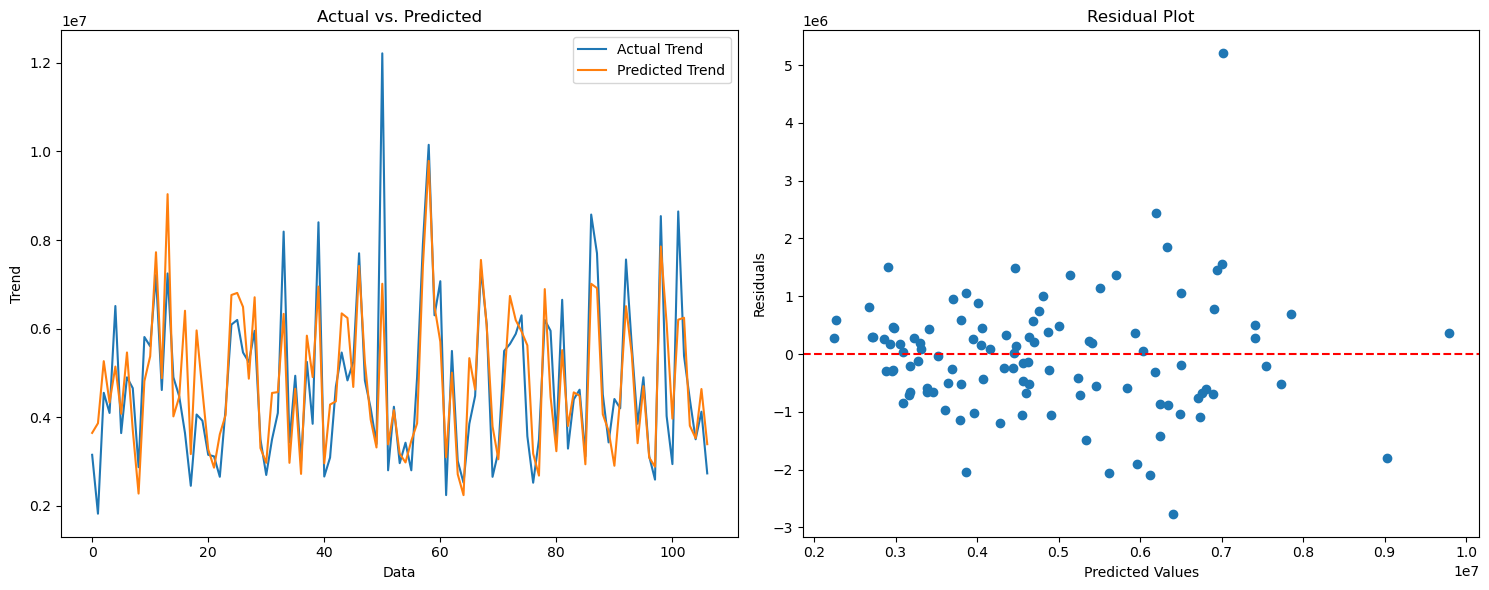

In [57]:
plt.figure(figsize=(15, 6))

# Plot Actual vs. Predicted values
plt.subplot(1, 2, 1)
plt.plot(np.arange(len(Test_Y)), Test_Y, label='Actual Trend')

plt.plot(np.arange(len(Test_Y)), pred2, label='Predicted Trend')
plt.xlabel('Data')
plt.ylabel('Trend')
plt.legend()
plt.title('Actual vs. Predicted')
# Plot Residuals
residuals = Test_Y - pred2

plt.subplot(1, 2, 2)
plt.scatter(pred2, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.tight_layout()
plt.show()